### Exploratory Data Analysis (EDA)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set()

df = pd.read_excel('oasis_longitudinal_demographics.xlsx')
df

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0087,OAS2_0087_MR2,Demented,2,754,F,R,98,17,1.0,21.0,2.0,1502.836122,0.659579,1.167792
1,OAS2_0164,OAS2_0164_MR2,Demented,2,580,M,R,79,20,1.0,25.0,2.0,1710.450000,0.759990,1.026040
2,OAS2_0120,OAS2_0120_MR2,Demented,2,595,F,R,78,14,3.0,15.0,2.0,1401.130000,0.700165,1.252560
3,OAS2_0087,OAS2_0087_MR1,Demented,1,0,F,R,96,17,1.0,26.0,1.0,1464.910000,0.682722,1.198030
4,OAS2_0046,OAS2_0046_MR2,Demented,2,575,F,R,85,15,2.0,22.0,1.0,1483.250000,0.747742,1.183210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,OAS2_0022,OAS2_0022_MR1,Nondemented,1,0,F,R,61,16,3.0,30.0,0.0,1312.780000,0.804868,1.336850
369,OAS2_0094,OAS2_0094_MR1,Nondemented,1,0,F,R,61,16,1.0,30.0,0.0,1512.750000,0.771088,1.160140
370,OAS2_0186,OAS2_0186_MR1,Nondemented,1,0,F,R,61,13,2.0,30.0,0.0,1319.020000,0.801006,1.330540
371,OAS2_0030,OAS2_0030_MR1,Nondemented,1,0,F,R,60,18,1.0,30.0,0.0,1402.100000,0.821582,1.251690


In [2]:
df = df.loc[df['Visit']==1] # use first visit data only because of the analysis we're doing
df = df.reset_index(drop=True) # reset index after filtering first visit data
df['M/F'] = df['M/F'].replace(['F','M'], [0,1]) # M/F column
df['Group'] = df['Group'].replace(['Converted'], ['Demented']) # Target variable
df['Group'] = df['Group'].replace(['Demented', 'Nondemented'], [1,0]) # Target variable
df = df.drop(['MRI ID', 'Visit', 'Hand'], axis=1) # Drop unnecessary column

In [3]:
df

,Subject ID,Group,MR Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0087,1,0,0,96,17,1.0,26.0,1.0,1464.91,0.682722,1.19803
1,OAS2_0071,1,0,0,83,13,2.0,27.0,1.0,1390.81,0.704681,1.26185
2,OAS2_0146,1,0,0,80,15,2.0,20.0,1.0,1731.90,0.684678,1.01334
3,OAS2_0064,1,0,0,78,8,5.0,23.0,1.0,1462.40,0.690761,1.20009
4,OAS2_0088,1,0,1,78,12,4.0,21.0,1.0,1477.47,0.671714,1.18784
...,...,...,...,...,...,...,...,...,...,...,...,...
145,OAS2_0022,0,0,0,61,16,3.0,30.0,0.0,1312.78,0.804868,1.33685
146,OAS2_0094,0,0,0,61,16,1.0,30.0,0.0,1512.75,0.771088,1.16014
147,OAS2_0186,0,0,0,61,13,2.0,30.0,0.0,1319.02,0.801006,1.33054
148,OAS2_0030,0,0,0,60,18,1.0,30.0,0.0,1402.10,0.821582,1.25169


In [4]:
# bar drawing function
def bar_chart(feature):
    Demented = df[df['Group']==1][feature].value_counts()
    Nondemented = df[df['Group']==0][feature].value_counts()
    df_bar = pd.DataFrame([Demented,Nondemented])
    df_bar.index = ['Demented','Nondemented']
    df_bar.plot(kind='bar',stacked=True, figsize=(8,5))

Text(0.5, 1.0, 'Gender and Demented rate')

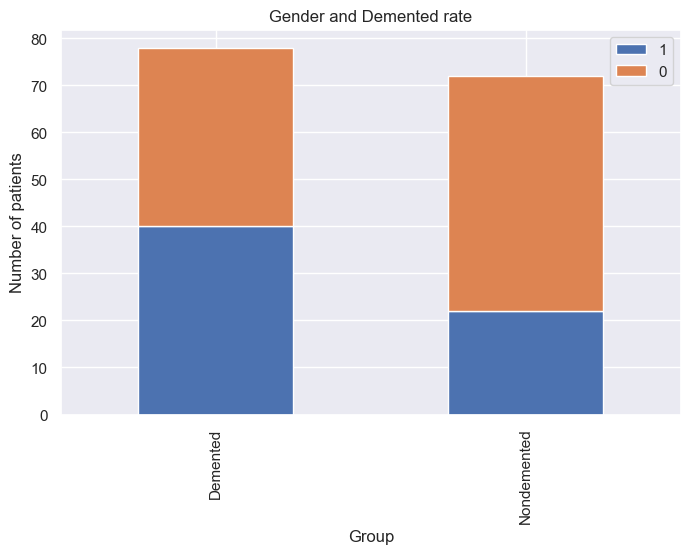

In [5]:
# Gender  and  Group ( Femal=0, Male=1)
bar_chart('M/F')
plt.xlabel('Group')
plt.ylabel('Number of patients')
plt.legend()
plt.title('Gender and Demented rate')

c:\Users\sayan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
c:\Users\sayan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


(15.3, 30.0)

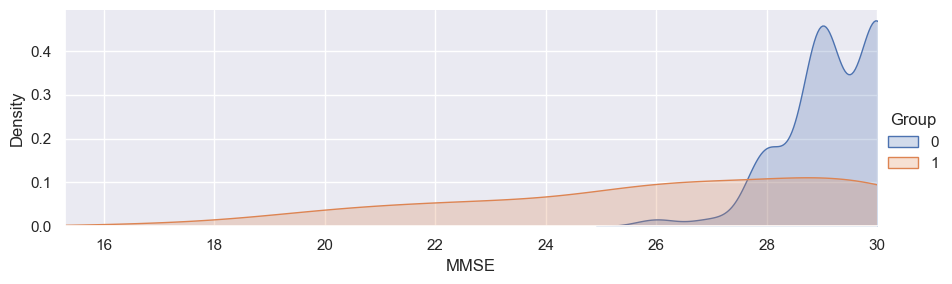

In [6]:
#MMSE : Mini Mental State Examination
# Nondemented = 0, Demented =1
# Nondemented has higher test result ranging from 25 to 30. 
#Min 17 ,MAX 30
facet= sns.FacetGrid(df,hue="Group", aspect=3)
facet.map(sns.kdeplot,'MMSE',shade= True)
facet.set(xlim=(0, df['MMSE'].max()))
facet.add_legend()
plt.xlim(15.30)

c:\Users\sayan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
c:\Users\sayan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
c:\Users\sayan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
c:\Users\sayan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprec

(0.6, 0.9)

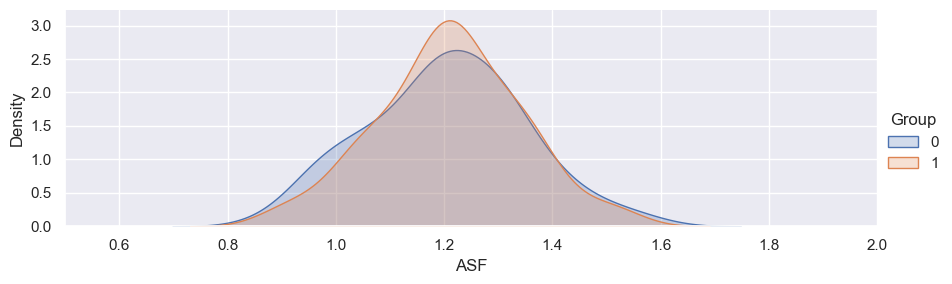

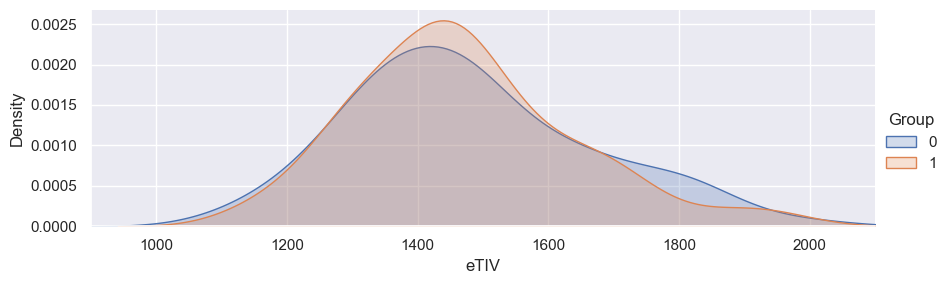

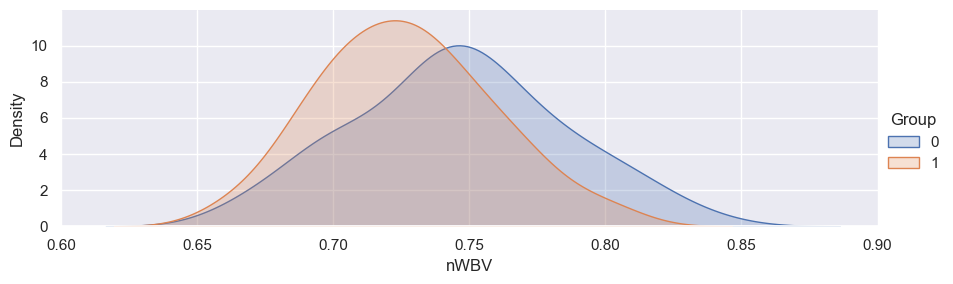

In [7]:
#bar_chart('ASF') = Atlas Scaling Factor
facet= sns.FacetGrid(df,hue="Group", aspect=3)
facet.map(sns.kdeplot,'ASF',shade= True)
facet.set(xlim=(0, df['ASF'].max()))
facet.add_legend()
plt.xlim(0.5, 2)

#eTIV = Estimated Total Intracranial Volume
facet= sns.FacetGrid(df,hue="Group", aspect=3)
facet.map(sns.kdeplot,'eTIV',shade= True)
facet.set(xlim=(0, df['eTIV'].max()))
facet.add_legend()
plt.xlim(900, 2100)

#'nWBV' = Normalized Whole Brain Volume
# Nondemented = 0, Demented =1
facet= sns.FacetGrid(df,hue="Group", aspect=3)
facet.map(sns.kdeplot,'nWBV',shade= True)
facet.set(xlim=(0, df['nWBV'].max()))
facet.add_legend()
plt.xlim(0.6,0.9)

c:\Users\sayan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
c:\Users\sayan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


(50.0, 100.0)

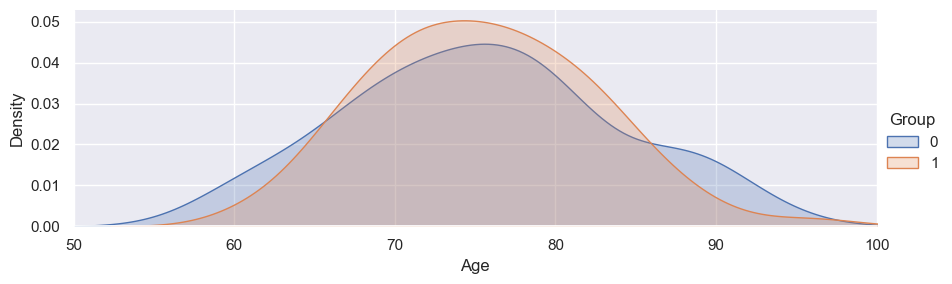

In [8]:
#AGE. Nondemented =0, Demented =0
facet= sns.FacetGrid(df,hue="Group", aspect=3)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, df['Age'].max()))
facet.add_legend()
plt.xlim(50,100)

c:\Users\sayan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
c:\Users\sayan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


(0.0, 0.16)

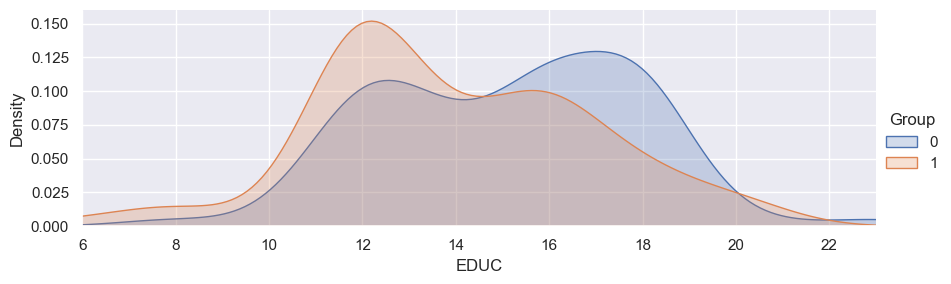

In [9]:
#'EDUC' = Years of Education
# Nondemented = 0, Demented =1
facet= sns.FacetGrid(df,hue="Group", aspect=3)
facet.map(sns.kdeplot,'EDUC',shade= True)
facet.set(xlim=(df['EDUC'].min(), df['EDUC'].max()))
facet.add_legend()
plt.ylim(0, 0.16)

### Data Pre-Processing

In [10]:
df

,Subject ID,Group,MR Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0087,1,0,0,96,17,1.0,26.0,1.0,1464.91,0.682722,1.19803
1,OAS2_0071,1,0,0,83,13,2.0,27.0,1.0,1390.81,0.704681,1.26185
2,OAS2_0146,1,0,0,80,15,2.0,20.0,1.0,1731.90,0.684678,1.01334
3,OAS2_0064,1,0,0,78,8,5.0,23.0,1.0,1462.40,0.690761,1.20009
4,OAS2_0088,1,0,1,78,12,4.0,21.0,1.0,1477.47,0.671714,1.18784
...,...,...,...,...,...,...,...,...,...,...,...,...
145,OAS2_0022,0,0,0,61,16,3.0,30.0,0.0,1312.78,0.804868,1.33685
146,OAS2_0094,0,0,0,61,16,1.0,30.0,0.0,1512.75,0.771088,1.16014
147,OAS2_0186,0,0,0,61,13,2.0,30.0,0.0,1319.02,0.801006,1.33054
148,OAS2_0030,0,0,0,60,18,1.0,30.0,0.0,1402.10,0.821582,1.25169


In [11]:
# Check missing values by each column
pd.isnull(df).sum() 

Subject ID    0
Group         0
MR Delay      0
M/F           0
Age           0
EDUC          0
SES           8
MMSE          0
CDR           0
eTIV          0
nWBV          0
ASF           0
dtype: int64

In [12]:
# DRemove row with missing values
df_dropna = df.dropna(axis=0, how='any')
pd.isnull(df_dropna).sum()

Subject ID    0
Group         0
MR Delay      0
M/F           0
Age           0
EDUC          0
SES           0
MMSE          0
CDR           0
eTIV          0
nWBV          0
ASF           0
dtype: int64

In [13]:
df_dropna

,Subject ID,Group,MR Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0087,1,0,0,96,17,1.0,26.0,1.0,1464.91,0.682722,1.19803
1,OAS2_0071,1,0,0,83,13,2.0,27.0,1.0,1390.81,0.704681,1.26185
2,OAS2_0146,1,0,0,80,15,2.0,20.0,1.0,1731.90,0.684678,1.01334
3,OAS2_0064,1,0,0,78,8,5.0,23.0,1.0,1462.40,0.690761,1.20009
4,OAS2_0088,1,0,1,78,12,4.0,21.0,1.0,1477.47,0.671714,1.18784
...,...,...,...,...,...,...,...,...,...,...,...,...
145,OAS2_0022,0,0,0,61,16,3.0,30.0,0.0,1312.78,0.804868,1.33685
146,OAS2_0094,0,0,0,61,16,1.0,30.0,0.0,1512.75,0.771088,1.16014
147,OAS2_0186,0,0,0,61,13,2.0,30.0,0.0,1319.02,0.801006,1.33054
148,OAS2_0030,0,0,0,60,18,1.0,30.0,0.0,1402.10,0.821582,1.25169


In [14]:
df_dropna['Group'].value_counts()

0    72
1    70
Name: Group, dtype: int64

In [15]:
df.shape

(150, 12)

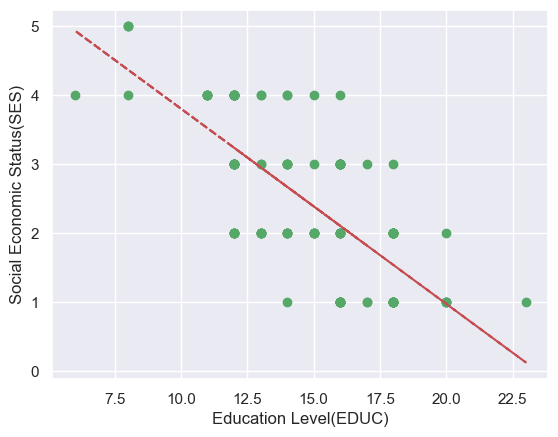

In [16]:
# Imputation
# Draw scatter plot between EDUC and SES
x = df['EDUC']
y = df['SES']

ses_not_null_index = y[~y.isnull()].index
x = x[ses_not_null_index]
y = y[ses_not_null_index]

# Draw trend line in red
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, y, 'go', x, p(x), "r--")
plt.xlabel('Education Level(EDUC)')
plt.ylabel('Social Economic Status(SES)')

plt.show()

In [17]:
df.groupby(['EDUC'])['SES'].median()

EDUC
6     4.0
8     5.0
11    4.0
12    3.0
13    2.0
14    3.0
15    2.0
16    2.0
17    1.0
18    2.0
20    1.0
23    1.0
Name: SES, dtype: float64

In [18]:
df["SES"].fillna(df.groupby("EDUC")["SES"].transform("median"), inplace=True)
pd.isnull(df['SES']).value_counts()

False    150
Name: SES, dtype: int64

In [19]:
# Splitting Test/Validation/Train Sets
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler 
from sklearn.model_selection import cross_val_score

In [20]:
# Dataset with imputation
Y = df['Group'].values # Target for the model
X = df[['M/F', 'Age', 'EDUC', 'SES', 'MMSE', 'eTIV', 'nWBV', 'ASF']] # Features we use

# splitting into three sets
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, random_state=0)

# Feature scaling
scaler = MinMaxScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [21]:
# Dataset after dropping missing value rows
Y = df_dropna['Group'].values # Target for the model
X = df_dropna[['M/F', 'Age', 'EDUC', 'SES', 'MMSE', 'eTIV', 'nWBV', 'ASF']] # Features we use

# splitting into three sets
X_train_dna, X_test_dna, Y_train_dna, Y_test_dna = train_test_split(
    X, Y, random_state=0)

# Feature scaling
scaler = MinMaxScaler().fit(X_train_dna)
X_train_scaled_dna = scaler.transform(X_train_dna)
X_test_scaled_dna = scaler.transform(X_test_dna)

In [22]:
df

,Subject ID,Group,MR Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0087,1,0,0,96,17,1.0,26.0,1.0,1464.91,0.682722,1.19803
1,OAS2_0071,1,0,0,83,13,2.0,27.0,1.0,1390.81,0.704681,1.26185
2,OAS2_0146,1,0,0,80,15,2.0,20.0,1.0,1731.90,0.684678,1.01334
3,OAS2_0064,1,0,0,78,8,5.0,23.0,1.0,1462.40,0.690761,1.20009
4,OAS2_0088,1,0,1,78,12,4.0,21.0,1.0,1477.47,0.671714,1.18784
...,...,...,...,...,...,...,...,...,...,...,...,...
145,OAS2_0022,0,0,0,61,16,3.0,30.0,0.0,1312.78,0.804868,1.33685
146,OAS2_0094,0,0,0,61,16,1.0,30.0,0.0,1512.75,0.771088,1.16014
147,OAS2_0186,0,0,0,61,13,2.0,30.0,0.0,1319.02,0.801006,1.33054
148,OAS2_0030,0,0,0,60,18,1.0,30.0,0.0,1402.10,0.821582,1.25169


In [23]:
X_normalized = preprocessing.normalize(X)
X_normalized

array([[0.00000000e+00, 6.53780902e-02, 1.15773701e-02, ...,
        9.97635606e-01, 4.64948547e-04, 8.15884515e-04],
       [0.00000000e+00, 5.95576024e-02, 9.32829917e-03, ...,
        9.97991674e-01, 5.05651937e-04, 9.05454946e-04],
       [0.00000000e+00, 4.61380035e-02, 8.65087565e-03, ...,
        9.98830103e-01, 3.94870949e-04, 5.84418556e-04],
       ...,
       [0.00000000e+00, 4.61828399e-02, 9.84224456e-03, ...,
        9.98624417e-01, 6.06438227e-04, 1.00734616e-03],
       [0.00000000e+00, 4.27405108e-02, 1.28221532e-02, ...,
        9.98774503e-01, 5.85247239e-04, 8.91631166e-04],
       [7.24396183e-04, 4.34637710e-02, 8.69275420e-03, ...,
        9.98775726e-01, 5.83655422e-04, 9.22062170e-04]])

In [24]:
df_normalized = pd.DataFrame(X_normalized)
df_normalized

,0,1,2,3,4,5,6,7
0,0.000000,0.065378,0.011577,0.000681,0.017707,0.997636,0.000465,0.000816
1,0.000000,0.059558,0.009328,0.001435,0.019374,0.997992,0.000506,0.000905
2,0.000000,0.046138,0.008651,0.001153,0.011535,0.998830,0.000395,0.000584
3,0.000000,0.053254,0.005462,0.003414,0.015703,0.998436,0.000472,0.000819
4,0.000676,0.052712,0.008110,0.002703,0.014192,0.998472,0.000454,0.000803
...,...,...,...,...,...,...,...,...
137,0.000000,0.046401,0.012171,0.002282,0.022820,0.998585,0.000612,0.001017
138,0.000000,0.040281,0.010566,0.000660,0.019810,0.998935,0.000509,0.000766
139,0.000000,0.046183,0.009842,0.001514,0.022713,0.998624,0.000606,0.001007
140,0.000000,0.042741,0.012822,0.000712,0.021370,0.998775,0.000585,0.000892


In [25]:
df_normalized.to_csv("Normalized OASIS-2.csv", index=False)

### Constructing Convolutional Neural Networks Architecture

In [26]:
import tensorflow as tf
import keras
from keras.utils.vis_utils import plot_model
from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import Conv2D, Flatten
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing.image import ImageDataGenerator as IDG
from tensorflow.keras.layers import SeparableConv2D, BatchNormalization, MaxPool2D

In [27]:
def conv_block(filters, act='relu'):
    """Defining a Convolutional NN block for a Sequential CNN model. """
    
    block = Sequential()
    block.add(Conv2D(filters, 3, activation=act, padding='same'))
    block.add(Conv2D(filters, 3, activation=act, padding='same'))
    block.add(BatchNormalization())
    block.add(MaxPool2D())
    
    return block

In [28]:
def dense_block(units, dropout_rate, act='relu'):
    """Defining a Dense NN block for a Sequential CNN model. """
    
    block = Sequential()
    block.add(Dense(units, activation=act))
    block.add(BatchNormalization())
    block.add(Dropout(dropout_rate))
    
    return block

In [29]:
def construct_model(act='relu'):
    """Constructing a Sequential CNN architecture for performing the classification task. """
    
    model = Sequential([
        Input(shape=3),
        Conv2D(16, 3, activation=act, padding='same'),
        Conv2D(16, 3, activation=act, padding='same'),
        MaxPool2D(),
        conv_block(32),
        conv_block(64),
        conv_block(128),
        Dropout(0.2),
        conv_block(256),
        Dropout(0.2),
        Flatten(),
        dense_block(512, 0.7),
        dense_block(128, 0.5),
        dense_block(64, 0.3),
        Dense(4, activation='softmax')        
    ], name = "cnn_model")

    return model

In [30]:
#Defining a custom callback function to stop training our model when accuracy goes above 99%

class MyCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('val_acc') > 0.99:
            print("\nReached accuracy threshold! Terminating training.")
            self.model.stop_training = True
            
my_callback = MyCallback()

#EarlyStopping callback to make sure model is always learning
early_stopping = EarlyStopping(monitor='val_loss', patience=2)

In [31]:
model = tf.keras.models.Sequential([
   # preprocessing.RandomTranslation(height_factor=0.05, width_factor=0.05, fill_mode='constant'),
   # preprocessing.RandomRotation(factor=0.05, fill_mode='constant'),
   # preprocessing.RandomZoom(height_factor=(-0.05,0.05), width_factor=(-0.05,0.05), fill_mode='constant'),  
    Conv2D(32, (5,5), activation = 'relu', input_shape = (224,224, 3)),
    BatchNormalization(), 
    MaxPool2D(2,2),
    Dropout(0.2),
    Conv2D(64, (5,5), activation = 'relu'),
    BatchNormalization(), 
    MaxPool2D(2,2),
    Dropout(0.2),
    Conv2D(128, (5,5), activation = 'relu'),
    BatchNormalization(), 
    MaxPool2D(2,2),
    Dropout(0.2),
    Conv2D(256, (5,5), activation = 'relu'), 
    BatchNormalization(), 
    MaxPool2D(2,2),
    Dropout(0.2),
    Conv2D(512, (5,5), activation = 'relu'),
    BatchNormalization(),     
    MaxPool2D(2,2),
    Dropout(0.2),
    Conv2D(1024, (3,3), activation = 'relu'),
    BatchNormalization(), 
    Flatten(),   
    Dropout(0.4),
    Dense(4, activation = 'softmax')
])

In [32]:
EPOCHS = 20
BATCH_SIZE = 8

METRICS = [keras.metrics.CategoricalAccuracy(name='accuracy'),
           keras.metrics.Precision(name='precision'),
           keras.metrics.Recall(name='recall'),
           keras.metrics.AUC(name='auc')]

In [33]:
model.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(), metrics = ['accuracy'])
#model.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(), metrics = METRICS)
history = model.fit(X_train,
    steps_per_epoch=len(X_train),
    validation_data=X_test,
    validation_steps=len(X_test),
    #batch_size=BATCH_SIZE, 
    epochs=EPOCHS)

ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [ ]:
# # Defining other parameters for our CNN model

# model = construct_model()

# METRICS = [tf.keras.metrics.CategoricalAccuracy(name='acc'),
#            tf.keras.metrics.AUC(name='auc')] 
#         #   tfa.metrics.F1Score(num_classes=4)]

# CALLBACKS = [my_callback]
    
# model.compile(optimizer='adam',
#               loss=tf.losses.CategoricalCrossentropy(),
#               metrics=METRICS)

# model.summary()

ValueError: Input 0 of layer "conv2d" is incompatible with the layer: expected min_ndim=4, found ndim=2. Full shape received: (None, 3)

#test

In [35]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from boruta import BorutaPy

# Loading the dataset
data = pd.read_excel('oasis_longitudinal_demographics.xlsx')

# Preprocessing the data
X = data.drop(['Class'], axis=1).values
y = data['Class'].values

# Building the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(X.shape[1], X.shape[2], 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))

# Feature selection using Boruta algorithm
boruta = BorutaPy(estimator=model, n_estimators=100, random_state=1, max_depth=3, verbose=2)
boruta.fit(X, y)
X_features = X[:, boruta.support_]

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_features, y, test_size=0.2, random_state=42)

# Scaling the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Compiling the model
model.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(lr=0.001), metrics=['accuracy'])

# Training the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Evaluating the model
loss, accuracy = model.evaluate(X_test, y_test)
print

KeyError: "['Class'] not found in axis"